<a href="https://colab.research.google.com/github/azilberb/Zilberberg_BIX_F21/blob/main/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcment Learning Homework

## Section A - Notebook Setup [5 pts]

To help prepare you for the class project, we are going to ask you to set up your notebook slightly differently this time: Rather than installing explorationlib from one of its existing git repositories (such as `parenthetical-e` or `clappm`), install it from a git repository that you own.  Fork the code!

In [3]:
!pip install --upgrade git+https://github.com/azilberb/explorationlib
!pip install --upgrade git+https://github.com/MattChanTK/gym-maze.git

  Cloning https://github.com/azilberb/explorationlib to /tmp/pip-req-build-z4ipkwzo
  Running command git clone -q https://github.com/azilberb/explorationlib /tmp/pip-req-build-z4ipkwzo
  Created wheel for explorationlib: filename=explorationlib-0.0.1-py3-none-any.whl size=24681 sha256=a2468112e7494aa3de1a4d65e9016eb2503b15512cae222c792221748eb23cf6
  Stored in directory: /tmp/pip-ephem-wheel-cache-w60rto29/wheels/b0/be/67/1b5cb097acfde2d949f722cb16cd4a99d5453ec7ed1b5bd866
Successfully built explorationlib
  Cloning https://github.com/MattChanTK/gym-maze.git to /tmp/pip-req-build-9emid8wy
  Running command git clone -q https://github.com/MattChanTK/gym-maze.git /tmp/pip-req-build-9emid8wy
     |████████████████████████████████| 18.3 MB 20 kB/s 
  Created wheel for gym-maze: filename=gym_maze-0.4-py3-none-any.whl size=14241 sha256=93c90bf9d0c6d2e5a518d78b388e27e5fa2b3cf9836762a2bfdf1486dff6a2d5
  Stored in directory: /tmp/pip-ephem-wheel-cache-yhdmgb18/wheels/01/f8/86/0dd8c448e192abff02

In [4]:
# import basic modules
import shutil
import glob
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import explorationlib
import explorationlib

# import the type of environment we will be using
from explorationlib.local_gym import BanditUniform4

# import the components to build our agents
from explorationlib.agent import BanditActorCritic
from explorationlib.agent import Critic
from explorationlib.agent import EpsilonActor
from explorationlib.agent import RandomActor
from explorationlib.agent import SequentialActor
from explorationlib.agent import BoundedRandomActor
from explorationlib.agent import BoundedSequentialActor

# import the experimental framework
from explorationlib.run import experiment

# import some scoring functions
from explorationlib.score import total_reward
from explorationlib.score import action_entropy

# import some utility functions
from explorationlib.util import select_exp
from explorationlib.util import load
from explorationlib.util import save

# import some plotting functions
from explorationlib.plot import plot_bandit
from explorationlib.plot import plot_bandit_actions
from explorationlib.plot import plot_bandit_critic
from explorationlib.plot import plot_bandit_hist

pygame 2.1.0 (SDL 2.0.16, Python 3.7.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [5]:
# Pretty plots
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.greedy=True
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = "16"

# Dev
%load_ext autoreload
%autoreload 2

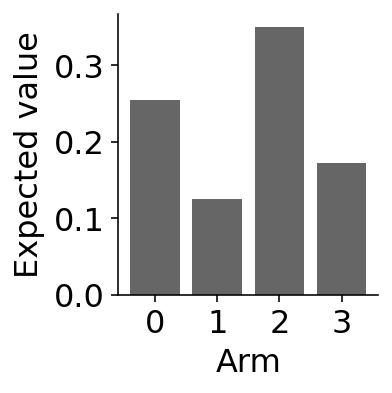

In [7]:
# Shared env params
seed = 503

# Create env
env = BanditUniform4(p_min=0.1, p_max=0.3, p_best=0.35)
env.seed(seed)

# Plot env
plot_bandit(env, alpha=0.6)

## Section B - Understanding the code structure [5 pts]

*pop quiz!*

In the lab, we went over the python classes for `RandomActor`, `SequentialActor`, and `EpsilonActor`.  We did not however show the code for `BoundedRandomActor` or `BoundedSequentialActor`.  Please post the class definitions for those agents below, so that we know that you know where to find them.

*Honestly I couldn't find them and I searched for over an hour- I have an awful memory and remember explicitly doing this during lab and now I have no clue which folder to look in...*

In [ ]:
# BoundedRandomActor 

In [ ]:
# BoundedSequentialActor

## Section C - Understanding Entropy

### Question [10 pts]

As discussed in lab, both the Random and Sequential explorers produce max-entropy behavior asymptotically.  If we ran 100 bandit experiments (similar to those in Section 1.3 of Lab), how often do you expect the measured entropy of the Random agent to *exceed* the entropy of the Sequential agent?  Please justify your answer.

*About 50% of the time because the average entropy should be about equal between the two explorers.*

### Question [5 pts]

If you had to pick one (either Random or Sequential) as your personal bandit exploration strategy, which would you choose and why?

*Sequential because it is more predictable and easier to keep track of.*

### Running sims of the $\epsilon$-greedy agent [5 pts]

Consider the $\epsilon$-greedy agent we explored in Section 1.4 of lab.  There, we only looked at three values for epsilon (0.05, 0.5, 0.95). Pick at least 3 more episilon values, add them to that list, and rerun the 40 experiments of 400 steps each.

In [8]:
ran = BanditActorCritic(
    RandomActor(num_actions=env.num_arms),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)
seq = BanditActorCritic(
    SequentialActor(num_actions=env.num_arms),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)
epy = BanditActorCritic(
    EpsilonActor(num_actions=env.num_arms, epsilon=0.1),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)

# organize them
agents = [ran, seq, epy]
names = ["random", "sequential", "ep-greedy"]
colors = ["blue", "green", "purple"]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_1:   0%|          | 0/100 [00:00<?, ?it/s]

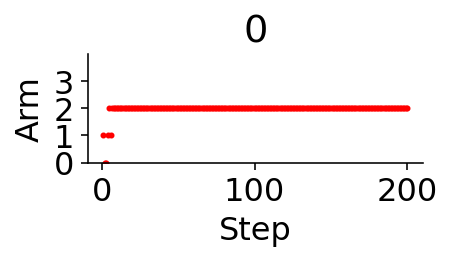

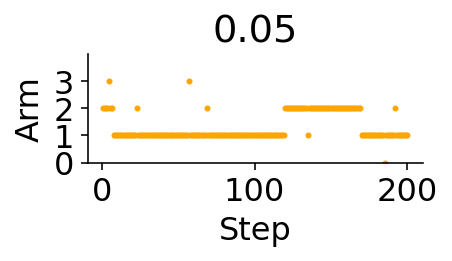

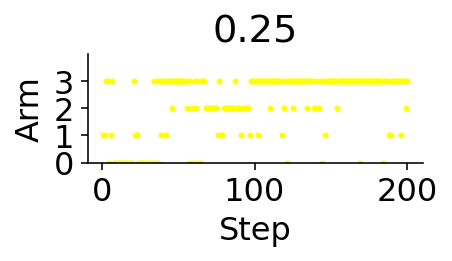

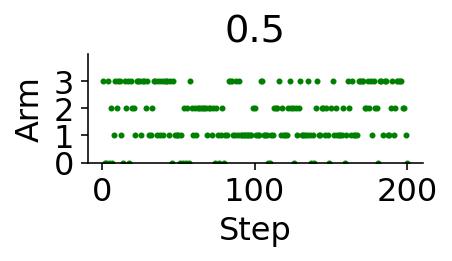

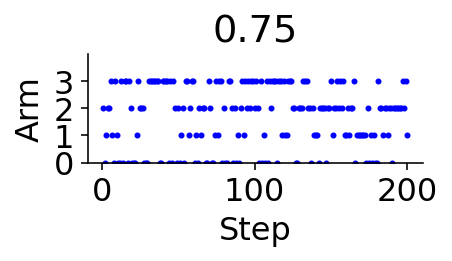

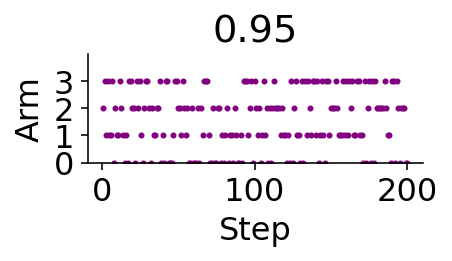

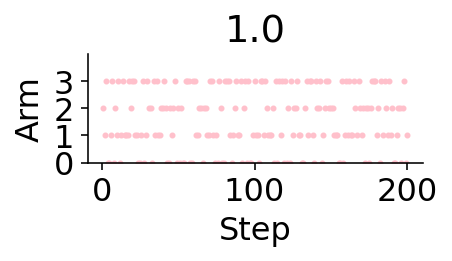

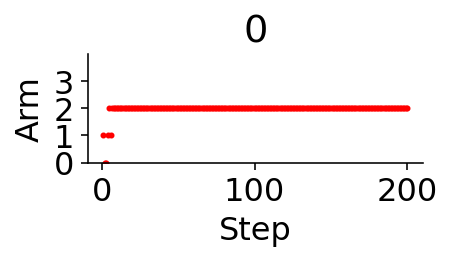

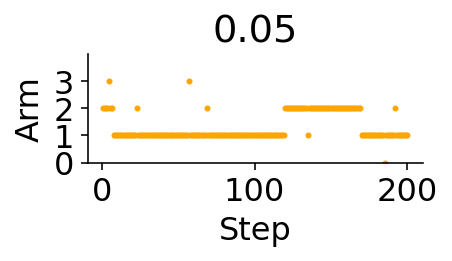

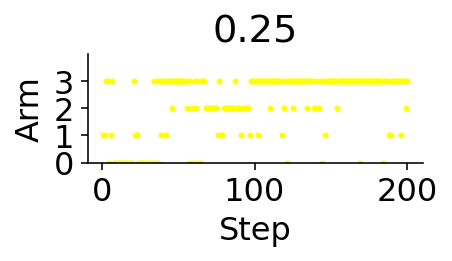

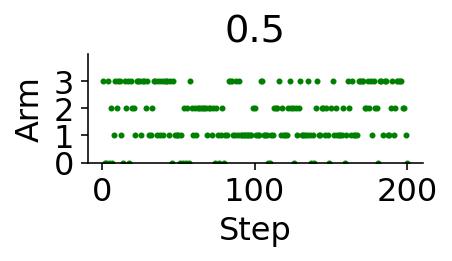

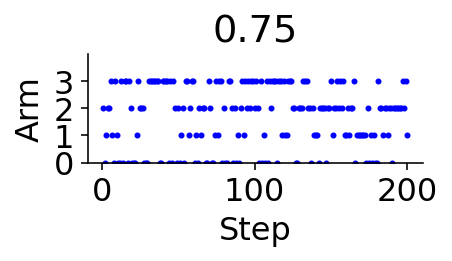

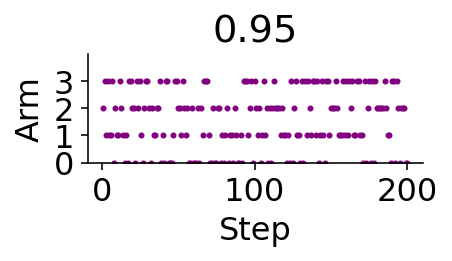

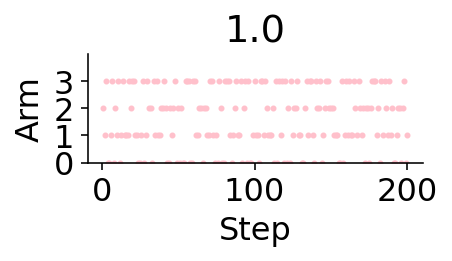

In [13]:
num_steps = 4 * 100
epsilons = [0, .05, .25, .5, .75, .95, 1.00]

names = [str(epsilon) for epsilon in epsilons]
colors = ["red", "orange", "yellow", "green", "blue", "purple", "pink"]

# !
results = []
for i, (name, epsilon) in enumerate(zip(names, epsilons)):
    agent = BanditActorCritic(
        EpsilonActor(num_actions=env.num_arms, epsilon=epsilon),
        Critic(num_inputs=env.num_arms, default_value=0.0)
    )
    log = experiment(
        f"ep_{name}",
        agent,
        env,
        num_steps=num_steps,
        num_experiments=100,
        dump=False,
        split_state=False,
    )
    results.append(log)

num_experiment = 40
for name, res, color in zip(names, results, colors):
    plot_bandit_actions(
        select_exp(res, num_experiment), 
        max_steps=200,
        s=4,
        title=name, 
        color=color,
        figsize=(3, 1)
        )
    
num_experiment = 40
for name, res, color in zip(names, results, colors):
    plot_bandit_actions(
        select_exp(res, num_experiment), 
        max_steps=200,
        s=4,
        title=name, 
        color=color,
        figsize=(3, 1)
        )

### Plotting the results [10 pts]

Plot the mean rewards and the mean entropy values for the agents.  (The two bar charts in Section 1.4).

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

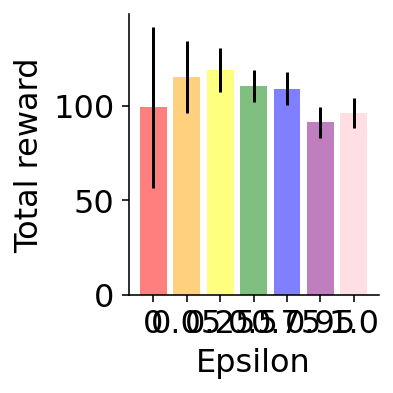

In [17]:
# Score
scores = []
for name, res, color in zip(names, results, colors):
    r = total_reward(res)
    scores.append(r)   

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(3, 3))
plt.bar(names, m, yerr=sd, color=colors, alpha=0.5)
plt.ylabel("Total reward")
plt.xlabel("Epsilon")
plt.tight_layout()
sns.despine()

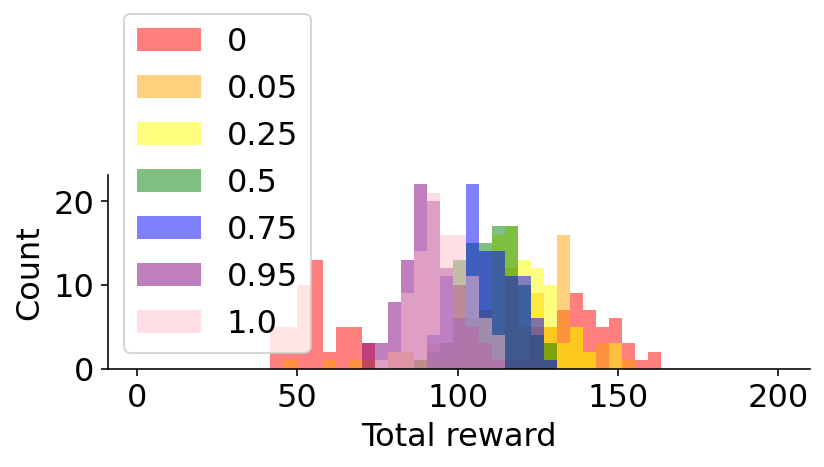

In [18]:
fig = plt.figure(figsize=(6, 3))
for (name, s, c) in zip(names, scores, colors):
    plt.hist(s, label=name, color=c, alpha=0.5, bins=np.linspace(1, 200, 50))
    plt.legend()
    plt.xlabel("Total reward")
    plt.ylabel("Count")
    plt.tight_layout()
    sns.despine()

action_entropy:   0%|          | 0/100 [00:00<?, ?it/s]

action_entropy:   0%|          | 0/100 [00:00<?, ?it/s]

action_entropy:   0%|          | 0/100 [00:00<?, ?it/s]

action_entropy:   0%|          | 0/100 [00:00<?, ?it/s]

action_entropy:   0%|          | 0/100 [00:00<?, ?it/s]

action_entropy:   0%|          | 0/100 [00:00<?, ?it/s]

action_entropy:   0%|          | 0/100 [00:00<?, ?it/s]

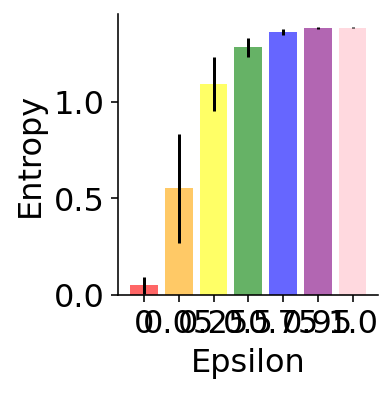

In [19]:
# Score
scores = []
for name, res, color in zip(names, results, colors):
    r = action_entropy(res)
    scores.append(r)   

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(3, 3))
plt.bar(names, m, yerr=sd, color=colors, alpha=0.6)
plt.ylabel("Entropy")
plt.xlabel("Epsilon")
plt.tight_layout()
sns.despine()

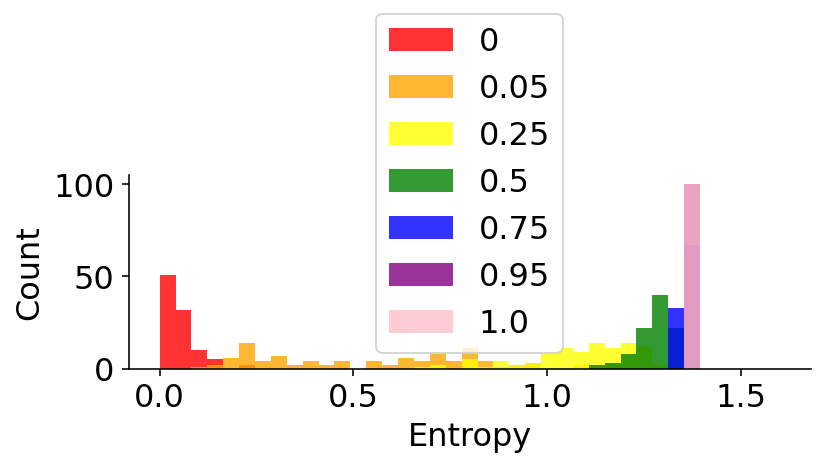

In [20]:
fig = plt.figure(figsize=(6, 3))
for (name, s, c) in zip(names, scores, colors):
    plt.hist(s, label=name, color=c, alpha=0.8, bins=np.linspace(0, 1.6, 40))
    plt.legend()
    plt.xlabel("Entropy")
    plt.ylabel("Count")
    plt.tight_layout()
    sns.despine()

### Question [5 pts] 

In your own words, explain how $\epsilon$ seems to relate to _total reward_ and _action entropy_. As $\epsilon$ grows, what happens?

*According to my data total reward maximizes at an epsilon value of about 0.25. It drops around 0.25 like a bell curve from 0 to 0.75. It then rises a little at 1. Since this is one set of data I assume the actual pattern with "infinite" simulations would be a bell curve with a peak at epsilon value 0.5.*

*The data for entropy value is much clearer. As the epsilon value rises so does the entropy. The rise is in a logorithmic curve.*

### Question [5 pts]

Let's ask this again from another direction. When looking at the performance of the $\epsilon$-greedy agents, what relationship do you see between _total reward_ and _action entropy_?  To answer, focus on the the bar plots of entropy and reward.

Can you explain this correlation in terms of the explore-exploit dilemma?

*Reward maximizes at a sweet spot somewhere in the middle of entropy (in this case 0.5 in this case), and drops as you get farther away from that sweet spot. This creates the explore-exploit dilemma since finding the sweet-spot can be difficult. You need some entropy or your reward drops (can't be fully explotive), but if you have too much entropy (too exploritive) then the reward drops as well. This means there must be a little bit of both to be truly an optimal solution.*

### Question [5 pts]

Does there seem to be any relationship between epsilon and the *standard deviation* of rewards (the error bars on the bar chart)?  Why might we expect such a relationship to exist? 

*As epsilon rises the standard deviation of the reward drops. This is expected since the higher the epsilon the higher chance of choosing explore over exploit. When one does a lot of exploring the choices are random and the averages will almost always be the average of the rewards (or very close to it). Vice versa if you are doing a lot of exploiting- once you set on a specific "arm" you are unlikely to switch and therefore are likely to end up with an average above or below the average of the rewards.*

## Section D - Tuning epsilon [15 pts]

In the lab, we did not attempt to tune the value of epsilon.  Now, it is your turn to do so.

Try to estimate the optimal value of epsilon (for this very particular bandit task). We recognize that the results will be quite noisy, and that it will be essentially impossible to tell which precise value of $\epsilon$ is truly the best. Give it a good shot but don't overanalyze it.

The coding is up to you, but we ask that you clearly show your tuning process: Put each batch of simulations you run into a separate code cell, so that we can see all of the plots you make. This way, you are showing us your work.

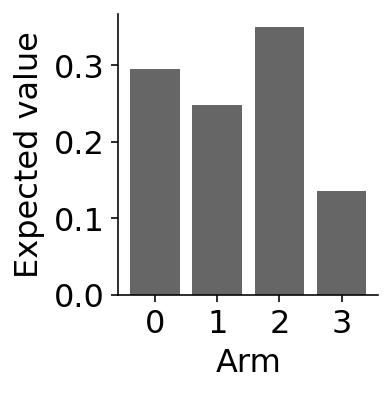

In [22]:
# DO NOT CHANGE:

# Shared env params
num_experiments = 100
seed = 593  

# Create env
env = BanditUniform4(p_min=0.1, p_max=0.3, p_best=0.35)
env.seed(seed)

# Plot env
plot_bandit(env, alpha=0.6)

num_steps = 4 * 100
num_experiments = 250

In [23]:
ran = BanditActorCritic(
    RandomActor(num_actions=env.num_arms),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)
seq = BanditActorCritic(
    SequentialActor(num_actions=env.num_arms),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)
epy = BanditActorCritic(
    EpsilonActor(num_actions=env.num_arms, epsilon=0.1),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)

# organize them
agents = [ran, seq, epy]
names = ["random", "sequential", "ep-greedy"]
colors = ["blue", "green", "purple"]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

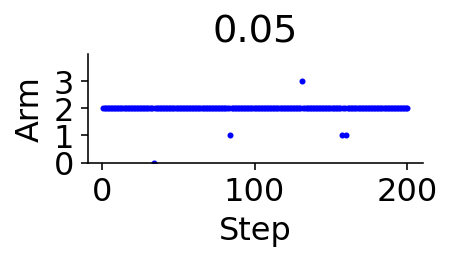

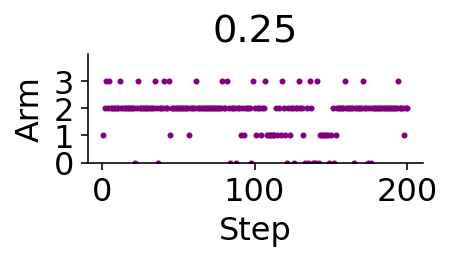

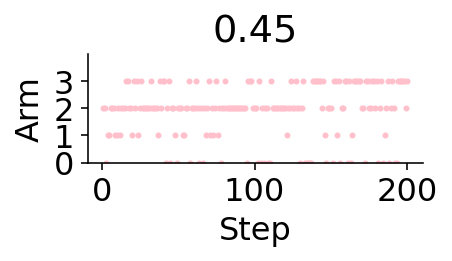

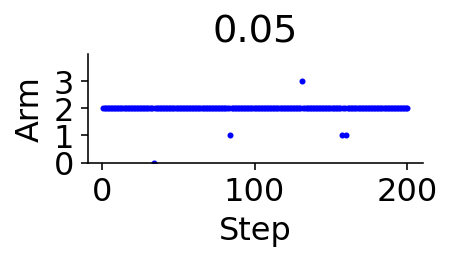

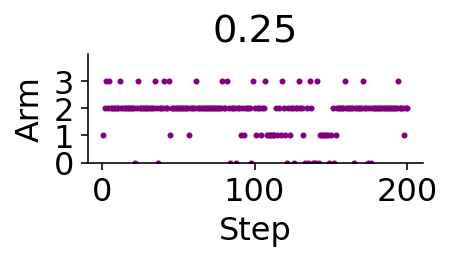

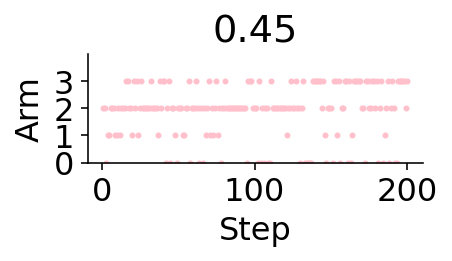

In [28]:
epsilons = [.05, .25, .45]

names = [str(epsilon) for epsilon in epsilons]
colors = ["blue", "purple", "pink"]

# !
results = []
for i, (name, epsilon) in enumerate(zip(names, epsilons)):
    agent = BanditActorCritic(
        EpsilonActor(num_actions=env.num_arms, epsilon=epsilon),
        Critic(num_inputs=env.num_arms, default_value=0.0)
    )
    log = experiment(
        f"ep_{name}",
        agent,
        env,
        num_steps=num_steps,
        num_experiments=100,
        dump=False,
        split_state=False,
    )
    results.append(log)

for name, res, color in zip(names, results, colors):
    plot_bandit_actions(
        select_exp(res, num_experiment), 
        max_steps=200,
        s=4,
        title=name, 
        color=color,
        figsize=(3, 1)
        )
    
for name, res, color in zip(names, results, colors):
    plot_bandit_actions(
        select_exp(res, num_experiment), 
        max_steps=200,
        s=4,
        title=name, 
        color=color,
        figsize=(3, 1)
        )

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

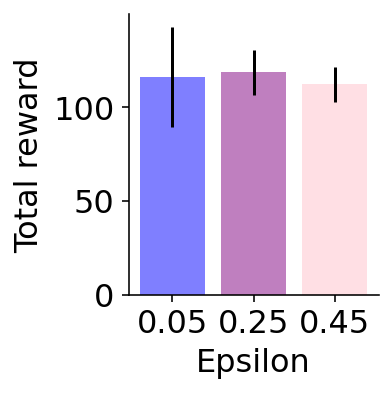

In [29]:
# Score
scores = []
for name, res, color in zip(names, results, colors):
    r = total_reward(res)
    scores.append(r)   

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(3, 3))
plt.bar(names, m, yerr=sd, color=colors, alpha=0.5)
plt.ylabel("Total reward")
plt.xlabel("Epsilon")
plt.tight_layout()
sns.despine()

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

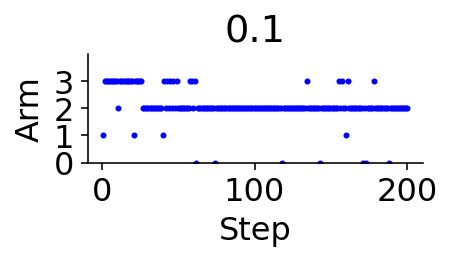

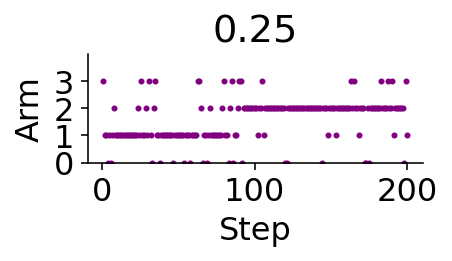

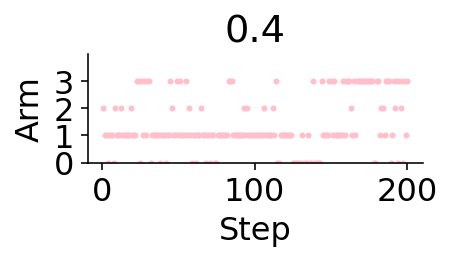

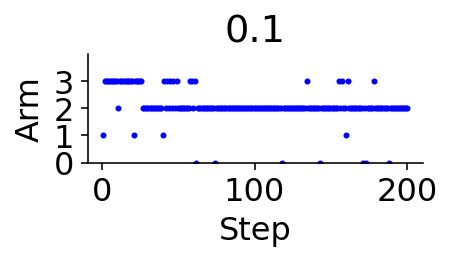

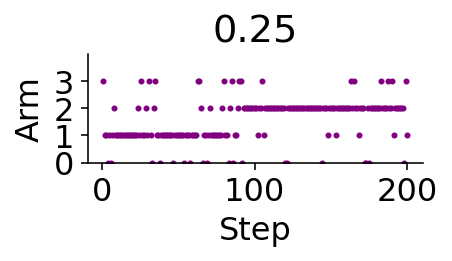

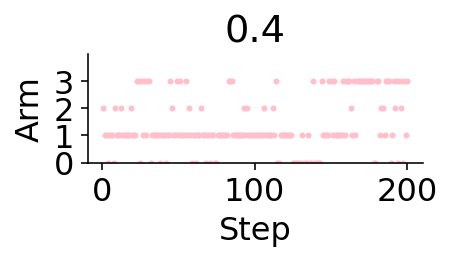

In [31]:
epsilons = [.1, .25, .4]

names = [str(epsilon) for epsilon in epsilons]
colors = ["blue", "purple", "pink"]

# !
results = []
for i, (name, epsilon) in enumerate(zip(names, epsilons)):
    agent = BanditActorCritic(
        EpsilonActor(num_actions=env.num_arms, epsilon=epsilon),
        Critic(num_inputs=env.num_arms, default_value=0.0)
    )
    log = experiment(
        f"ep_{name}",
        agent,
        env,
        num_steps=num_steps,
        num_experiments=100,
        dump=False,
        split_state=False,
    )
    results.append(log)

for name, res, color in zip(names, results, colors):
    plot_bandit_actions(
        select_exp(res, num_experiment), 
        max_steps=200,
        s=4,
        title=name, 
        color=color,
        figsize=(3, 1)
        )
    
for name, res, color in zip(names, results, colors):
    plot_bandit_actions(
        select_exp(res, num_experiment), 
        max_steps=200,
        s=4,
        title=name, 
        color=color,
        figsize=(3, 1)
        )

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

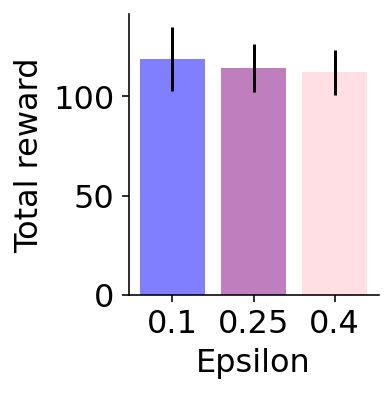

In [32]:
# Score
scores = []
for name, res, color in zip(names, results, colors):
    r = total_reward(res)
    scores.append(r)   

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(3, 3))
plt.bar(names, m, yerr=sd, color=colors, alpha=0.5)
plt.ylabel("Total reward")
plt.xlabel("Epsilon")
plt.tight_layout()
sns.despine()

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

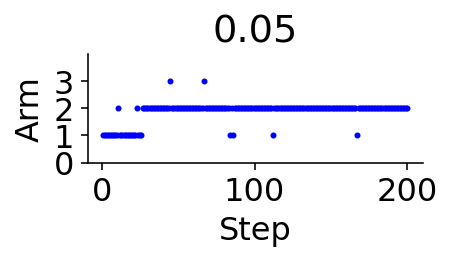

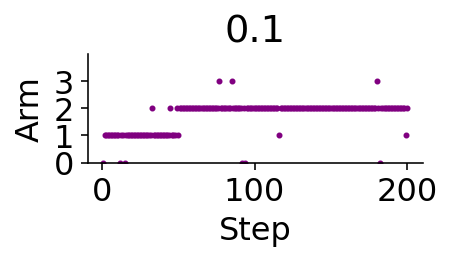

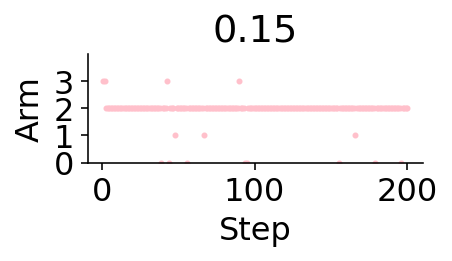

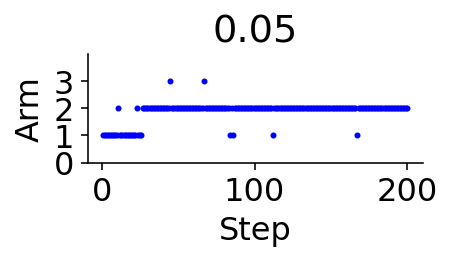

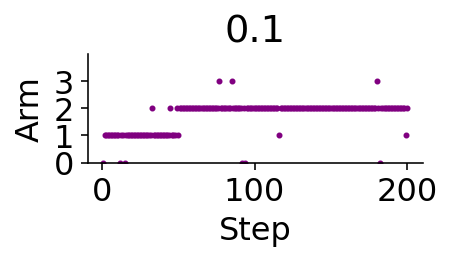

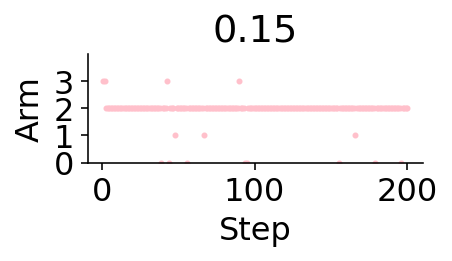

In [45]:
epsilons = [.05, .1, .15]

names = [str(epsilon) for epsilon in epsilons]
colors = ["blue", "purple", "pink"]

# !
results = []
for i, (name, epsilon) in enumerate(zip(names, epsilons)):
    agent = BanditActorCritic(
        EpsilonActor(num_actions=env.num_arms, epsilon=epsilon),
        Critic(num_inputs=env.num_arms, default_value=0.0)
    )
    log = experiment(
        f"ep_{name}",
        agent,
        env,
        num_steps=num_steps,
        num_experiments=100,
        dump=False,
        split_state=False,
    )
    results.append(log)

for name, res, color in zip(names, results, colors):
    plot_bandit_actions(
        select_exp(res, num_experiment), 
        max_steps=200,
        s=4,
        title=name, 
        color=color,
        figsize=(3, 1)
        )
    
for name, res, color in zip(names, results, colors):
    plot_bandit_actions(
        select_exp(res, num_experiment), 
        max_steps=200,
        s=4,
        title=name, 
        color=color,
        figsize=(3, 1)
        )

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

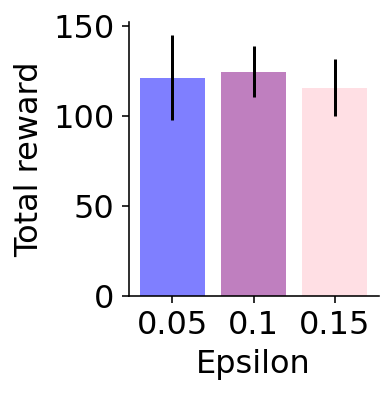

In [46]:
# Score
scores = []
for name, res, color in zip(names, results, colors):
    r = total_reward(res)
    scores.append(r)   

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(3, 3))
plt.bar(names, m, yerr=sd, color=colors, alpha=0.5)
plt.ylabel("Total reward")
plt.xlabel("Epsilon")
plt.tight_layout()
sns.despine()

## Section E - Comparing the tuned agents

### Coding [10 pts]

Rerun the code from Section 2.3 of the lab, to compare the tuned $\epsilon$-greedy agent to the tuned bounded random and bounded sequential agents. Now, since we have tuned all three agents, the playing field is a bit more level.

Plot the average rewards of the three agents.

In [41]:
bound = 75  # use 75 as the "tuned" bound
epsilon = 0.1

b-ran:   0%|          | 0/250 [00:00<?, ?it/s]

b-seq:   0%|          | 0/250 [00:00<?, ?it/s]

ep-greedy:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

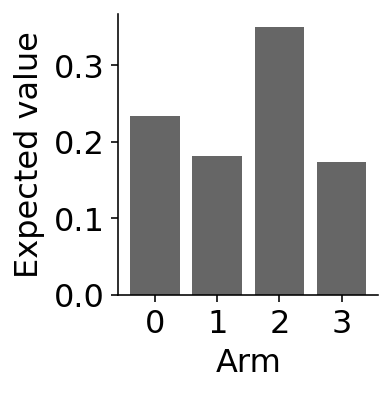

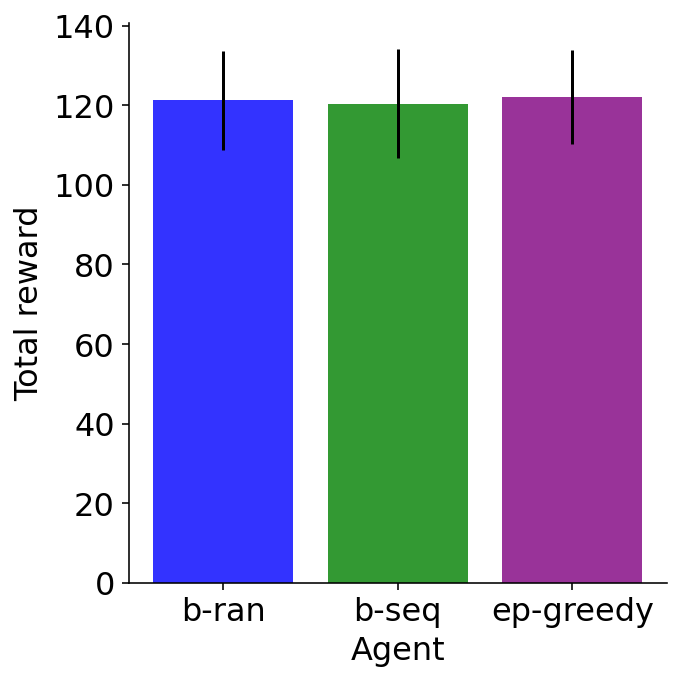

In [42]:
# DO NOT CHANGE:
# Shared env params
seed = 195

# Create env
env = BanditUniform4(p_min=0.1, p_max=0.3, p_best=0.35)
env.seed(seed)

# Plot env
plot_bandit(env, alpha=0.6)

bounded_ran = BanditActorCritic(
    BoundedRandomActor(num_actions=env.num_arms, bound=bound),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)
bounded_seq = BanditActorCritic(
    BoundedSequentialActor(num_actions=env.num_arms, bound=bound),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)
epy = BanditActorCritic(
    EpsilonActor(num_actions=env.num_arms, epsilon=epsilon),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)

# organize them
agents = [bounded_ran, bounded_seq, epy]
names = ["b-ran", "b-seq", "ep-greedy"]
colors = ["blue", "green", "purple"]

num_steps = 400  # Three rounds per arm, about that anyway
num_experiments = 250

# !
results = []
for name, agent in zip(names, agents):
    log = experiment(
        f"{name}",
        agent,
        env,
        num_steps=num_steps,
        num_experiments=num_experiments,
        dump=False,
        split_state=False,
    )
    results.append(log)

# Score
scores = []
for name, res, color in zip(names, results, colors):
    r = total_reward(res)
    scores.append(r)   

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(5, 5))
plt.bar(names, m, yerr=sd, color=colors, alpha=0.8)
plt.ylabel("Total reward")
plt.xlabel("Agent")
plt.tight_layout()
sns.despine()

### Question [5 pts]

So, given these results, what's a better way to maximize total reward in this (reporting) task? Is it BoundedRandomActor? Or, BoundedSeqentialActor? Or is it _EpsilonActor_?

*EpsilonActor seems to be the best way to maximize the total reward (but not by a lot).*

## Section F - Changing the number of steps

Throughout the tuning process, we have assumed that each bandit experiment lasted 400 steps. As a result, our agents are essentially designed to perform well for that particular setup.  In this section, we are going to ask you to run simulation batches with different values of `num_steps`, to see if the results of the previous section still hold true in a more general situation.

### Coding task: Re-running Section E with num_steps = 25, 100, and 1600 [10 pts]

Between section E and section F combined, you should end up with four total plots, showing the bar chart of mean rewards for step counts 25, 100, 400, and 1600.

b-ran:   0%|          | 0/250 [00:00<?, ?it/s]

b-seq:   0%|          | 0/250 [00:00<?, ?it/s]

ep-greedy:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

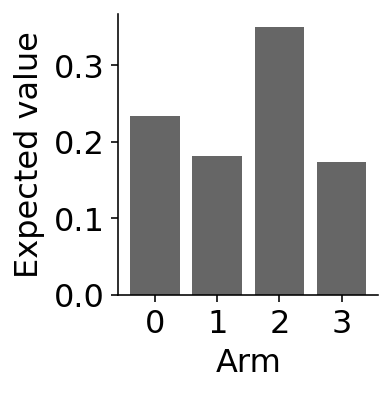

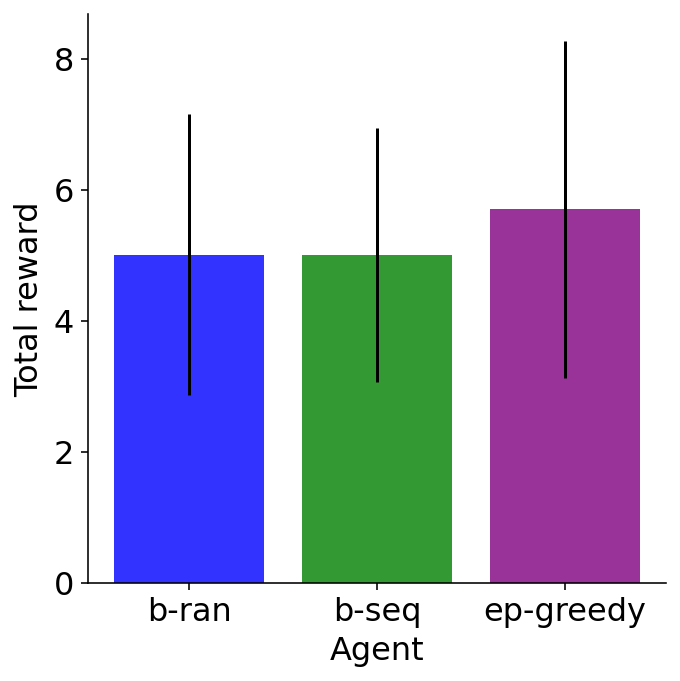

In [49]:
# DO NOT CHANGE:
# Shared env params
seed = 195

# Create env
env = BanditUniform4(p_min=0.1, p_max=0.3, p_best=0.35)
env.seed(seed)

# Plot env
plot_bandit(env, alpha=0.6)

bounded_ran = BanditActorCritic(
    BoundedRandomActor(num_actions=env.num_arms, bound=bound),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)
bounded_seq = BanditActorCritic(
    BoundedSequentialActor(num_actions=env.num_arms, bound=bound),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)
epy = BanditActorCritic(
    EpsilonActor(num_actions=env.num_arms, epsilon=epsilon),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)

# organize them
agents = [bounded_ran, bounded_seq, epy]
names = ["b-ran", "b-seq", "ep-greedy"]
colors = ["blue", "green", "purple"]

num_steps = 25  # Three rounds per arm, about that anyway
num_experiments = 250

# !
results = []
for name, agent in zip(names, agents):
    log = experiment(
        f"{name}",
        agent,
        env,
        num_steps=num_steps,
        num_experiments=num_experiments,
        dump=False,
        split_state=False,
    )
    results.append(log)

# Score
scores = []
for name, res, color in zip(names, results, colors):
    r = total_reward(res)
    scores.append(r)   

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(5, 5))
plt.bar(names, m, yerr=sd, color=colors, alpha=0.8)
plt.ylabel("Total reward")
plt.xlabel("Agent")
plt.tight_layout()
sns.despine()

b-ran:   0%|          | 0/250 [00:00<?, ?it/s]

b-seq:   0%|          | 0/250 [00:00<?, ?it/s]

ep-greedy:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

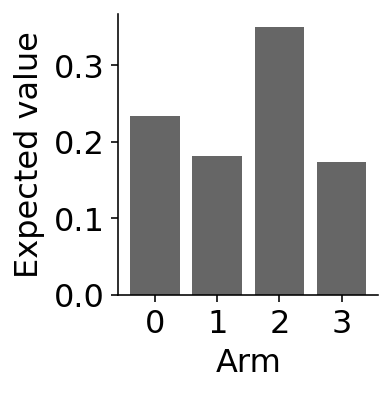

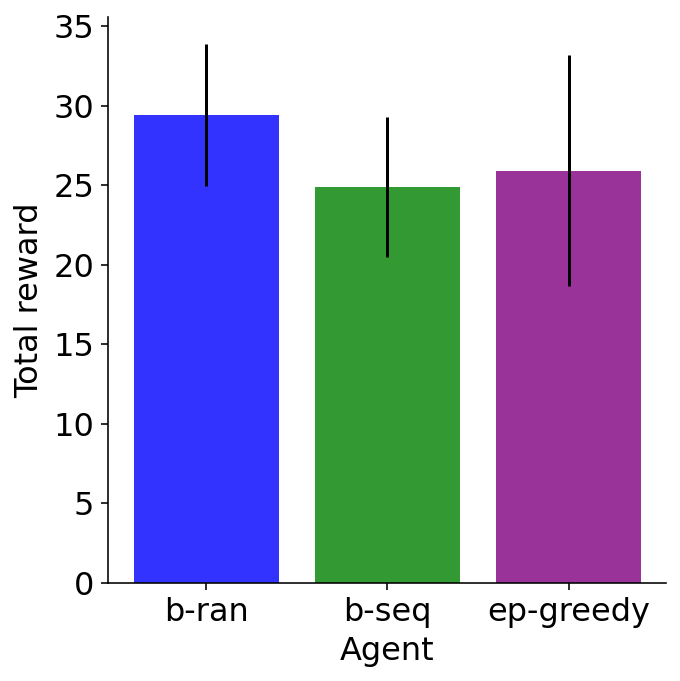

In [50]:
# DO NOT CHANGE:
# Shared env params
seed = 195

# Create env
env = BanditUniform4(p_min=0.1, p_max=0.3, p_best=0.35)
env.seed(seed)

# Plot env
plot_bandit(env, alpha=0.6)

bounded_ran = BanditActorCritic(
    BoundedRandomActor(num_actions=env.num_arms, bound=bound),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)
bounded_seq = BanditActorCritic(
    BoundedSequentialActor(num_actions=env.num_arms, bound=bound),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)
epy = BanditActorCritic(
    EpsilonActor(num_actions=env.num_arms, epsilon=epsilon),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)

# organize them
agents = [bounded_ran, bounded_seq, epy]
names = ["b-ran", "b-seq", "ep-greedy"]
colors = ["blue", "green", "purple"]

num_steps = 100  # Three rounds per arm, about that anyway
num_experiments = 250

# !
results = []
for name, agent in zip(names, agents):
    log = experiment(
        f"{name}",
        agent,
        env,
        num_steps=num_steps,
        num_experiments=num_experiments,
        dump=False,
        split_state=False,
    )
    results.append(log)

# Score
scores = []
for name, res, color in zip(names, results, colors):
    r = total_reward(res)
    scores.append(r)   

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(5, 5))
plt.bar(names, m, yerr=sd, color=colors, alpha=0.8)
plt.ylabel("Total reward")
plt.xlabel("Agent")
plt.tight_layout()
sns.despine()

b-ran:   0%|          | 0/250 [00:00<?, ?it/s]

b-seq:   0%|          | 0/250 [00:00<?, ?it/s]

ep-greedy:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

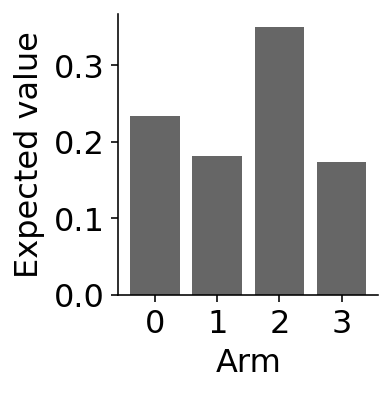

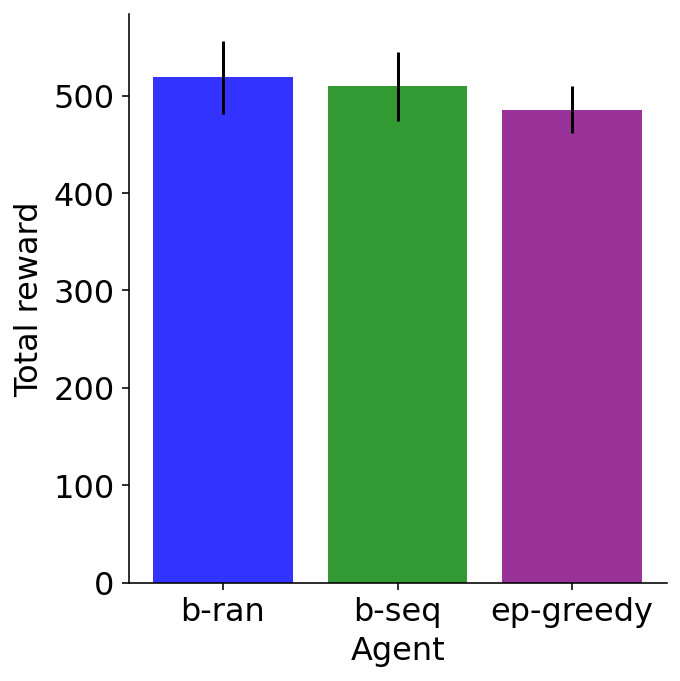

In [51]:
# DO NOT CHANGE:
# Shared env params
seed = 195

# Create env
env = BanditUniform4(p_min=0.1, p_max=0.3, p_best=0.35)
env.seed(seed)

# Plot env
plot_bandit(env, alpha=0.6)

bounded_ran = BanditActorCritic(
    BoundedRandomActor(num_actions=env.num_arms, bound=bound),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)
bounded_seq = BanditActorCritic(
    BoundedSequentialActor(num_actions=env.num_arms, bound=bound),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)
epy = BanditActorCritic(
    EpsilonActor(num_actions=env.num_arms, epsilon=epsilon),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)

# organize them
agents = [bounded_ran, bounded_seq, epy]
names = ["b-ran", "b-seq", "ep-greedy"]
colors = ["blue", "green", "purple"]

num_steps = 1600  # Three rounds per arm, about that anyway
num_experiments = 250

# !
results = []
for name, agent in zip(names, agents):
    log = experiment(
        f"{name}",
        agent,
        env,
        num_steps=num_steps,
        num_experiments=num_experiments,
        dump=False,
        split_state=False,
    )
    results.append(log)

# Score
scores = []
for name, res, color in zip(names, results, colors):
    r = total_reward(res)
    scores.append(r)   

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(5, 5))
plt.bar(names, m, yerr=sd, color=colors, alpha=0.8)
plt.ylabel("Total reward")
plt.xlabel("Agent")
plt.tight_layout()
sns.despine()

### Question [5 pts]

Did the same agent always win? Or did different agents perform better at higher or lower step counts (compared to the baseline of 400 steps)?  Base your answer on your plots.

*The ep-greedy agent performed best at the lower steps in comparison to the other agents, while the b-ran preformed better on the higher steps. The b-seq seemed to stay in the middle at all step-numbers.*